In [23]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
from skimage import io, color, filters, util
from skimage.segmentation import slic, mark_boundaries

## **1. [50] Thresholding**
### Terdapat suatu gambar **tools.jpg** yang terdiri dari beberapa peralatan yang berbeda. Lakukan pengolahan citra tersebut dalam citra grayscale.
<img src="Tugas Lab 5\tools.jpg">

### a. [10] Lakukan Simple Global Thresholding pada citra tersebut
> hint: gunakan library OpenCV \
> <code> cv2.threshold(img,x,y,cv.THRESH_BINARY) </code> \
> nilai x dan y berada dalam range nilai citranya \
> Misalnya: cv2.threshold(img,127,255,cv.THRESH_BINARY)

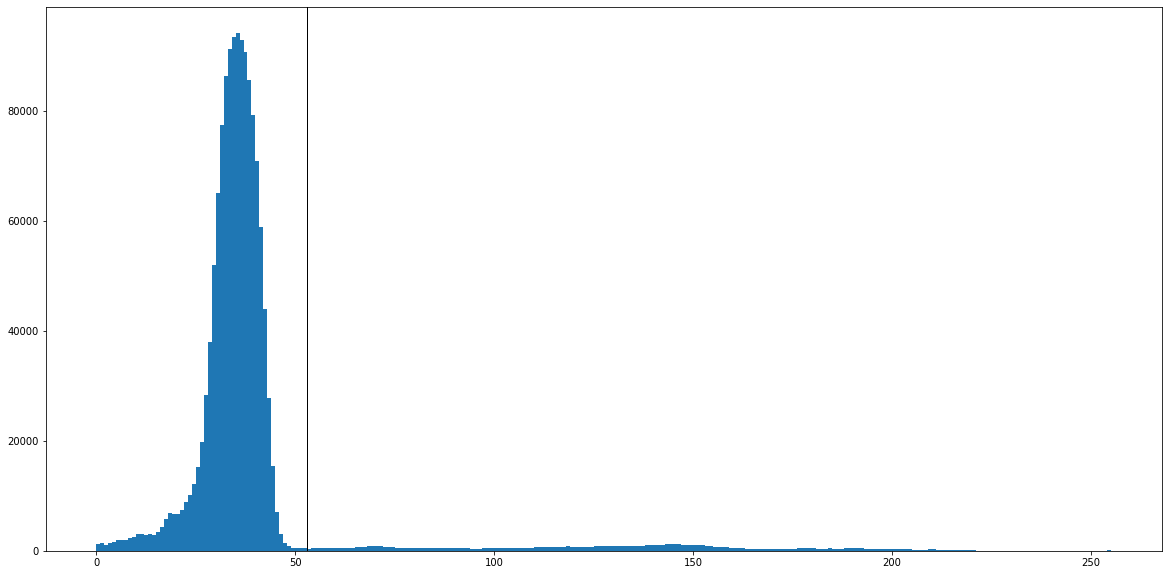

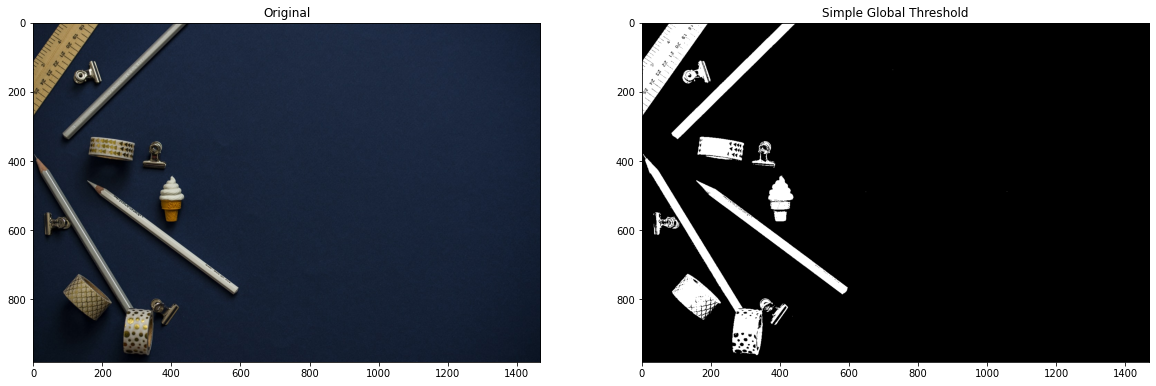

In [24]:
img = io.imread("Tugas Lab 5/tools.jpg")
gray = util.img_as_ubyte(color.rgb2gray(img))

plt.figure(figsize=(20,10))

plt.hist(gray.flatten(), 255)
plt.axvline(53, lw=1, color="black")
plt.show()

plt.figure(figsize=(20,10))
_, threshold = cv2.threshold(gray, 53, 255, cv2.THRESH_BINARY)
plt.subplot(1, 2, 1); plt.imshow(img, cmap="gray"); plt.title("Original")
plt.subplot(1, 2, 2); plt.imshow(threshold, cmap="gray"); plt.title("Simple Global Threshold")
plt.show()

### b. [10] Lakukan Otsu’s Thresholding (beserta histogramnya) pada citra tersebut

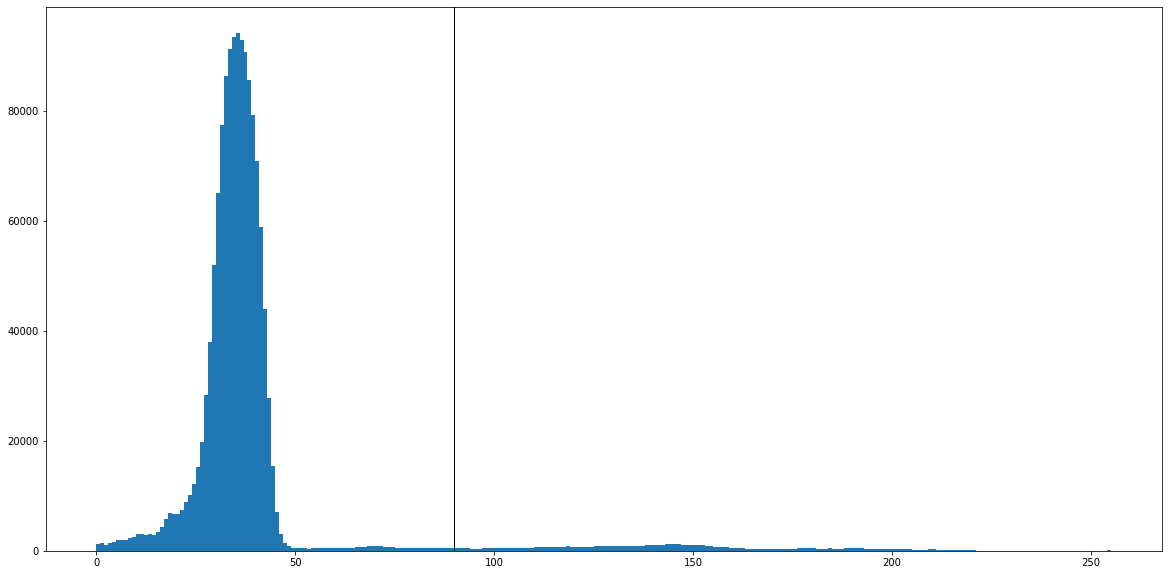

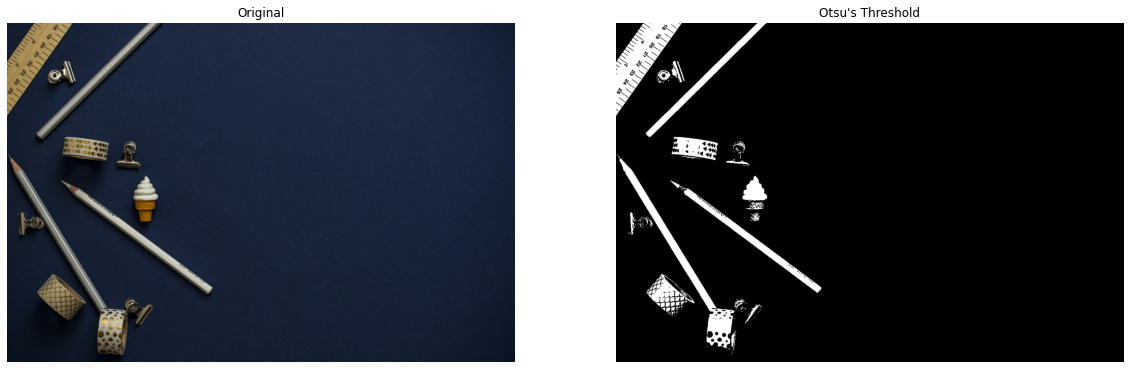

In [25]:
otsu = filters.threshold_otsu(gray)
otsu_img = util.img_as_float(gray > otsu)

plt.figure(figsize=(20,10))

plt.hist(gray.flatten(), 255)
plt.axvline(otsu, lw=1, color="black")
plt.show()

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1); plt.imshow(img, cmap="gray"); plt.title("Original"); plt.axis("off")
plt.subplot(1, 2, 2); plt.imshow(otsu_img, cmap="gray"); plt.title("Otsu's Threshold"); plt.axis("off")
plt.show()

### c. [15] Jelaskan perbedaan hasil dari simple global thresholding pada (a) dan Otsu’s Thresholding pada (b) dan alasan mengapa perbedaan tersebut bisa terjadi.

> Jika dilihat dari histogramnya, **Simple Global Thresholding** menjadikan piksel-piksel yang berada di sebelah kiri threshold T menjadi hitam dan di sebelah kanan threshold T menjadi putih. Hal ini menyebabkan beberapa detail yang lebih terang dari threshold, seperti tulisan pada pensil, hilang. Sedangkan untuk **Otsu's Method** mencari nilai threshold sehingga meminimalkan variansi dalam class dan memaksimalkan variansi antar class. Oleh karena itu, background dan foreground dapat dibedakan secara optimal. Namun, pada kasus ini bayangan terlihat cukup gelap sehingga dengan **Otsu's Method** dianggap sebagai background. Alhasil, objek-objek pada citra bentuknya tidak utuh.

### d. [15] Tentukan metode mana yang lebih optimal untuk citra ini dan mengapa?

Untuk citra ini, lebih optimal menggunakan **Simple Global Thresholding** karena dapat tetap mempertahankan bentuk objek-objek pada citra. Dapat dilihat bahwa pada citra hasil thresholding menggunakan **Otsu's Method**, beberapa penjepit tidak begitu terlihat bentuk utuhnya. Sehingga, jika ingin dilanjutkan ke tahap-tahap selanjutnya dapat menyulitkan.

## **2. [50] Clustering**
### Diberikan sebuah citra mountain.jpg.
<img src="Tugas Lab 5\mountain.jpg">

### a. [25] Gunakan algoritma SLIC untuk melakukan segmentasi, lakukan percobaan untuk 10, 50, dan 100 segmen.

SLIC number of segments: 7


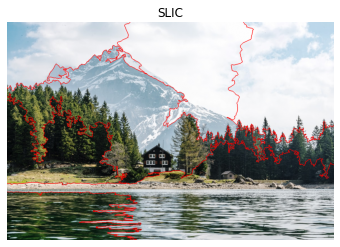

SLIC number of segments: 33


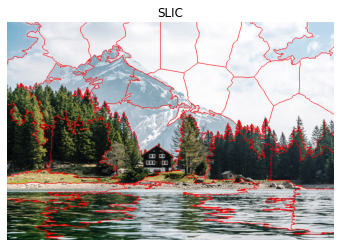

SLIC number of segments: 62


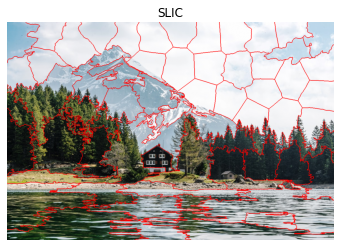

In [26]:
img2 = io.imread("Tugas Lab 5/mountain.jpg")

slic_segments = []

for segment in [10, 50, 100]:
    segments_slic = slic(img2, n_segments=segment, compactness=10, sigma=1, start_label=1)
    slic_segments.append(segments_slic)
    print(f"SLIC number of segments: {len(np.unique(segments_slic))}")
    plt.imshow(mark_boundaries(img2, segments_slic, color=(1,0,0)))
    plt.title('SLIC')
    plt.axis("off")
    plt.show()

### b. [10] Apa yang dapat disimpulkan dari percobaan pada (a)? Apakah pengaruh berbagai jumlah segmen terhadap hasil segmentasi? Jumlah segmen berapa yang menurut Anda memberikan hasil paling baik pada citra ini? Berikan penjelasannya.

> Semakin banyak jumlah segmen, maka semakin banyak pula clustering yang dilakukan pada citra. Dengan semakin banyaknya cluster, maka akan memaksimalkan perbedaan antar cluster. Jumlah segmen 100 paling baik di sini karena jika dilihat pada citra dengan segmen lebih sedikit, masih menjadikan sebagian dari danau dengan pepohonan sebagai satu segmen. Sedangkan pada citra dengan jumlah segmen 100 sudah dapat memisahkan antara pepohonan dengan danau.

### c. [15] Setelah memilih jumlah segmen yang paling baik pada soal 2b, visualisasikan citra dalam bentuk penyeragaman piksel untuk setiap superpiksel yang telah disegmentasi. Gunakan nilai median untuk memilih piksel yang dipilih untuk setiap superpiksel.

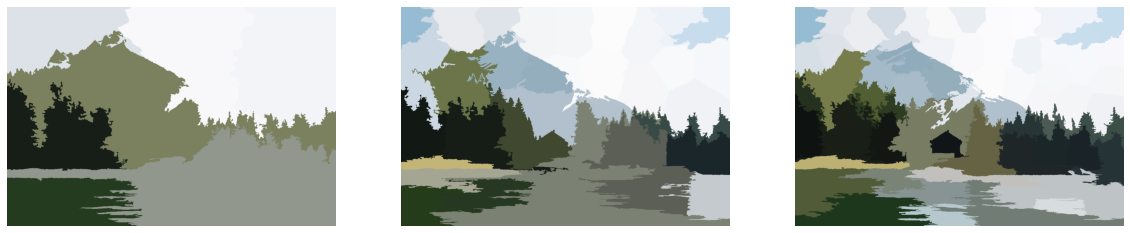

In [29]:
def superpixel_median_image(image, slic_labels):
    """
    Code taken from https://stackoverflow.com/a/57746835
    Turn image into superpixel image, given SLIC segment
    labels. (Modified to fit question requirements)
    """
    im_rp = image.reshape((image.shape[0]*image.shape[1],image.shape[2]))
    sli_1d=np.reshape(slic_labels,-1)
    uni=np.unique(sli_1d)
    new_img=np.zeros(im_rp.shape)

    for i in uni:
        loc=np.where(sli_1d==i)[0]
        #print(loc)
        mm=np.median(im_rp[loc,:],axis=0)
        new_img[loc,:]=mm

    return np.reshape(new_img,[image.shape[0],image.shape[1],image.shape[2]]).astype('uint8')
    

plt.figure(figsize=(20, 10))

plt.subplot(1, 3, 1); plt.imshow(superpixel_median_image(img2, slic_segments[0])); plt.axis("off")
plt.subplot(1, 3, 2); plt.imshow(superpixel_median_image(img2, slic_segments[1])); plt.axis("off")
plt.subplot(1, 3, 3); plt.imshow(superpixel_median_image(img2, slic_segments[2])); plt.axis("off")
plt.show()
